In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from collections import Counter
import random
from scipy import stats

## Diagrammen

### Staafdiagram

In [174]:
# function to add value labels
def addlabels(labels, data, text_buffer):
    for i in range(len(labels)):
        plt.text(i, data[i] + text_buffer, data[i], ha = 'center', color="#D3D3D3")

def staafdiagram(title, xlabel, ylabel, labels, data):
    plt.clf()
    fig = plt.figure()

    ax = fig.add_subplot(111)

    ax.spines["bottom"].set_color("#D3D3D3")
    ax.spines["top"].set_color("#D3D3D3")
    ax.spines["left"].set_color("#D3D3D3")
    ax.spines["right"].set_color("#D3D3D3")
    ax.xaxis.label.set_color("#D3D3D3")
    ax.yaxis.label.set_color("#D3D3D3")
    ax.tick_params(axis="both", colors="#D3D3D3")
    ax.set_facecolor("#FF0000")


    plt.title(title, color="#D3D3D3")

    plt.bar(labels, data, color='darkturquoise') # hex value for theme colour: #068f73
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    text_buffer = (plt.yticks()[0][1] - plt.yticks()[0][0])/20
    print(text_buffer)

    addlabels(labels, data, text_buffer)

    plt.savefig(f"{title} - sdg.svg")
    plt.show()


### Histogram

In [175]:
def is_scalar(value):
    # Check if the value is of a scalar type
    return isinstance(value, (int, float, complex))

def color_changer(colour:str):
    rgb = mcolors.to_rgb(colour)
    rgb_new = [i + 8/51 if i + 8/51 <= 1 else i - 8/51 for i in rgb]
    return mcolors.to_hex(rgb_new)

def histogram(*data, title, xlabel, ylabel, binsize, data_labels=None, colours=["darkturquoise", "springgreen", "khaki", "coral", "firebrick", "darkviolet"], legend:bool=False, legend_loc:str='upper right', average: bool=False, median: bool=False, mode: bool=False, x_scale="linear", y_scale="linear", x_range=None, y_range=None, x_min=None, x_max=None, y_min=None, y_max=None):
    plt.clf()
    fig = plt.figure()

    ax = fig.add_subplot(111)

    ax.spines["bottom"].set_color("#D3D3D3")
    ax.spines["top"].set_color("#D3D3D3")
    ax.spines["left"].set_color("#D3D3D3")
    ax.spines["right"].set_color("#D3D3D3")
    ax.xaxis.label.set_color("#D3D3D3")
    ax.yaxis.label.set_color("#D3D3D3")
    ax.tick_params(axis="both", colors="#D3D3D3")
    ax.set_facecolor("#FF0000")

    plt.title(title, color="#D3D3D3")

    if len(data) > 1:
        alpha = 0.75
    else:
        alpha = 1

    average_label = "-"
    median_label = "-"
    mode_label = "-"

    if data_labels is None:
        data_labels = [f"Data {i}" for i in range(1, len(data) + 1)]

    ymax = 0
        
    for i in range(len(data)):
        sort_set = sorted(set(data[i]), key=float)
        bins = np.arange(sort_set[0], sort_set[-1] + 2*binsize, binsize)
        plt.hist(data[i], bins=bins, color=colours[i], alpha=alpha, align="left", edgecolor='#068f73', label=data_labels[i]) # hex value for theme colour: #068f73

        if average:
            plt.axvline(np.mean(data[i]), color=colours[i+1] if len(data) == 1 else colours[i], linestyle='dashed', linewidth=1, label=f"Gemiddelde {data_labels[i]}")
            average_label = "Gemiddelde"
        
        if median:
            plt.axvline(np.median(data[i]), color=colours[i+1] if len(data) == 1 else colours[i], linestyle='dotted', linewidth=1, label=f"Mediaan {data_labels[i]}")
            median_label = "Mediaan"

        if mode:
            plt.axvline(stats.mode(data[i])[0], color=colours[i+1] if len(data) == 1 else colours[i], linestyle='dashdot', linewidth=1, label=f"Modus {data_labels[i]}")
            mode_label = "Modus"
            
        ymax = max(ymax, max(np.histogram(data[i], bins=bins)[0]))
    
    plt.ylim(top=ymax + 1/8*ymax)

    if x_range is not None and not is_scalar(x_range):
        plt.xlim(x_range)

    elif x_min is not None or x_max is not None:
        if x_min is not None:
            plt.xlim(left=x_min)
        if x_max is not None:
            plt.xlim(right=x_max)

    if y_range is not None and not is_scalar(y_range): 
        plt.ylim(y_range)
    
    elif y_min is not None or y_max is not None:
        if y_min is not None:
            plt.ylim(bottom=y_min)
        if y_max is not None:
            plt.ylim(top=y_max)

    plt.xscale(x_scale)
    plt.yscale(y_scale)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if legend:
        plt.legend(loc=legend_loc)

    if average or median or mode:
        plt.savefig(f"{title} - hg (Settings = {average_label}, {median_label}, {mode_label}).svg")
    
    else:
        plt.savefig(f"{title} - hg.svg")
        
    plt.show()
    

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the color
color = 'darkturquoise'

# Get the RGB value
rgb = [255*rgb for rgb in mcolors.to_rgb(color)]

# Print the RGB value
print(rgb)
print(mcolors.to_hex(color))

[0.0, 206.0, 209.0]
#00ced1


### Cirkeldiagram

In [177]:
test = "-"
print(f"test {test} test")

test - test


In [178]:
def cirkeldiagram(title, labels, data, colours=None):
    plt.clf()
    
    plt.title(title, color="#D3D3D3")

    plt.pie(data, labels=labels, colors=colours, autopct='%1.1f%%', textprops={'color':"#D3D3D3"}) # hex value for theme colour: #068f73

    plt.savefig(f"{title} - cdg.svg")
    plt.show()

### Lijndiagram 

In [179]:
def lijndiagram(*data, title, xlabel, ylabel, data_x, data_labels=None, colours=["deepskyblue", "springgreen", "khaki", "coral", "firebrick", "darkviolet"], legend=None, legend_loc='upper right', average=False, median=False, mode=False, x_scale="linear", y_scale="linear", x_range=None, y_range=None, x_min=None, x_max=None, y_min=None, y_max=None):
    plt.clf()
    fig = plt.figure()

    ax = fig.add_subplot(111)

    ax.spines["bottom"].set_color("#D3D3D3")
    ax.spines["top"].set_color("#D3D3D3")
    ax.spines["left"].set_color("#D3D3D3")
    ax.spines["right"].set_color("#D3D3D3")
    ax.xaxis.label.set_color("#D3D3D3")
    ax.yaxis.label.set_color("#D3D3D3")
    ax.tick_params(axis="both", colors="#D3D3D3")
    ax.set_facecolor("#FF0000")
    ax.yaxis.grid(True)

    plt.title(title, color="#D3D3D3")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    average_label = "-"
    median_label = "-"
    mode_label = "-"

    if data_labels is None:
        data_labels = [f"Data {i}" for i in range(1, len(data) + 1)]

    for i in range(len(data)):
        plt.plot(data_x, data[i], color=colours[i], label=data_labels[i]) # hex value for theme colour: #068f73
        plt.scatter(data_x, data[i], color=colours[i], s=4)

        if average:
            plt.axhline(np.mean(data[i]), color=colours[i+1] if len(data) == 1 else colours[i], linestyle='dashed', linewidth=1, label=f"Gemiddelde {data_labels[i] if data_labels is not None else ''}")
            average_label = "Gemiddelde"

        if median:
            plt.axhline(np.median(data[i]), color=colours[i+1] if len(data) == 1 else colours[i], linestyle='dotted', linewidth=1, label=f"Mediaan {data_labels[i] if data_labels is not None else ''}")
            median_label = "Mediaan"

        if mode:
            plt.axhline(stats.mode(data[i])[0], color=colours[i+1] if len(data) == 1 else colours[i], linestyle='dashdot', linewidth=1, label=f"Modus {data_labels[i] if data_labels is not None else ''}")
            mode_label = "Modus"

    if x_range is not None and not is_scalar(x_range):
        plt.xlim(x_range)

    elif x_min is not None or x_max is not None:
        if x_min is not None:
            plt.xlim(left=x_min)
        if x_max is not None:
            plt.xlim(right=x_max)

    if y_range is not None and not is_scalar(y_range): 
        plt.ylim(y_range)
    
    elif y_min is not None or y_max is not None:
        if y_min is not None:
            plt.ylim(bottom=y_min)
        if y_max is not None:
            plt.ylim(top=y_max)

    plt.xscale(x_scale)
    plt.yscale(y_scale)


    if legend is not None:
        plt.legend(loc=legend_loc)

    if average or median or mode:
        plt.savefig(f"{title} - ldg (Settings = {average_label}, {median_label}, {mode_label}).svg")
    
    else:
        plt.savefig(f"{title} - ldg.svg")


    plt.show()

## Data

### Data verkochten fietsen in 1 week

0.25


<Figure size 640x480 with 0 Axes>

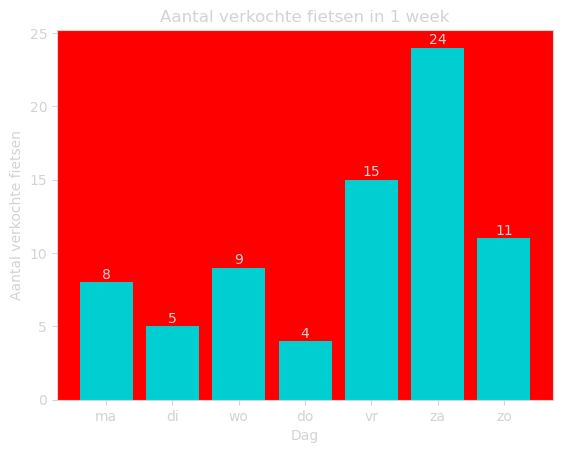

In [180]:
dagen = ["ma", "di", "wo", "do", "vr", "za", "zo"]
verkochte_fietsen = [8, 5, 9, 4, 15, 24, 11]
titel = "Aantal verkochte fietsen in 1 week"
xlabel = "Dag"
ylabel = "Aantal verkochte fietsen"

staafdiagram(title=titel, xlabel=xlabel, ylabel=ylabel, labels=dagen, data=verkochte_fietsen)



### Data cijfers leerlingen

<Figure size 640x480 with 0 Axes>

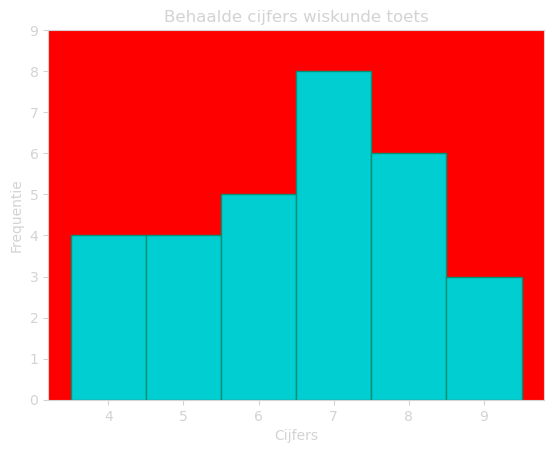

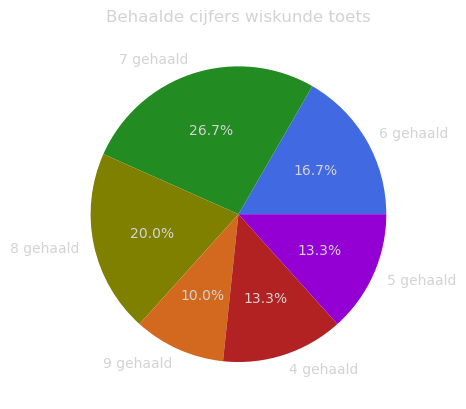

In [181]:
cijfers = [6, 6, 7, 8, 9, 7, 4, 5, 8, 7, 4, 8, 6, 8, 9, 7, 5, 4, 8, 7, 7, 5, 6, 9, 7, 4, 7, 8, 5, 6]

titel = "Behaalde cijfers wiskunde toets"
xlabel = "Cijfers"
ylabel = "Frequentie"

data_count = Counter(cijfers)
labels = data_count.keys()
labels = [f"{label} gehaald" for label in labels ]
values = data_count.values()

colours = ["royalblue", "forestgreen", "olive", "chocolate", "firebrick", "darkviolet"]

histogram(cijfers, title=titel, xlabel=xlabel, ylabel=ylabel, binsize=1)
cirkeldiagram(title=titel, labels=labels, data=values, colours=colours)

In [182]:
l = [1,2,3,5,3,4,3,4,1, 0.5, 1.0001]
print(sorted(set(l), key=float))

[0.5, 1, 1.0001, 2, 3, 4, 5]


### Data cijfers klas A en klas B

Sorted Dictionary 1: {4.5: 5, 5.0: 4, 5.5: 5, 6.0: 6, 6.5: 7, 7.0: 7, 7.5: 9, 8.0: 8, 8.5: 6, 9.0: 4, 9.5: 1}
Sorted Dictionary 2: {3.0: 5, 3.5: 6, 4.0: 9, 4.5: 10, 5.0: 11, 5.5: 9, 6.0: 8, 6.5: 7, 7.0: 3}
class A average: 6.911290322580645
class B average: 4.9411764705882355


<Figure size 640x480 with 0 Axes>

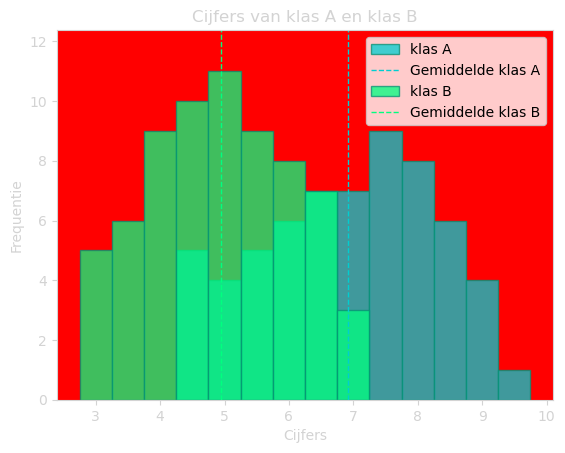

In [183]:
class_a = [num + 1.5 for num in [4.0, 6.0, 3.0, 4.5, 7.5, 6.5, 5.0, 4.5, 5.5, 7.5, 4.5, 6.5, 6.0, 7.0, 3.0, 5.0, 4.5, 3.5, 4.5, 7.5, 3.5, 5.0, 5.0, 5.5, 5.0, 6.5, 5.5, 7.5, 6.5, 6.5, 8.0, 5.0, 4.5, 7.0, 6.0, 3.0, 6.0, 7.0, 4.0, 5.5, 6.0, 4.0, 6.5, 6.5, 3.5, 6.0, 7.0, 4.0, 6.0, 6.5, 3.5, 5.5, 7.0, 3.0, 5.0, 5.5, 4.0, 6.0, 5.5, 3.0, 6.0, 7.0]]

class_b = [4.0, 4.5, 3.0, 4.5, 7.0, 3.0, 5.0, 4.5, 4.0, 4.5, 4.5, 3.0, 5.0, 6.5, 3.0, 5.0, 4.5, 3.5, 4.5, 7.0, 3.5, 4.5, 4.5, 4.0, 5.0, 6.5, 4.0, 6.5, 6.5, 4.0, 6.5, 5.0, 4.5, 5.5, 5.0, 3.5, 5.0, 7.0, 4.0, 6.0, 5.5, 4.0, 6.5, 5.0, 3.5, 6.0, 5.0, 4.0, 6.0, 6.5, 3.5, 6.0, 5.0, 3.0, 5.0, 6.0, 4.0, 6.0, 6.0, 3.5, 6.0, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5]

# Sorting dictionaries by keys
sorted_dict1 = dict(sorted(Counter(class_a).items()))
sorted_dict2 = dict(sorted(Counter(class_b).items()))

# Print sorted dictionaries
print("Sorted Dictionary 1:", sorted_dict1)
print("Sorted Dictionary 2:", sorted_dict2)

print(f"class A average: {np.mean(class_a)}")
print(f"class B average: {np.mean(class_b)}")

titel_a = "Cijfers klas A"
titel_b = "Cijfers klas B"
titel_ab = "Cijfers van klas A en klas B"
xlabel = "Cijfers"
ylabel = "Frequentie"
data_label = ["klas A", "klas B"]


# histogram(class_a, title=titel_a, xlabel=xlabel, ylabel=ylabel, binsize=0.5)
# histogram(class_b, title=titel_b, xlabel=xlabel, ylabel=ylabel, binsize=0.5)
histogram(class_a, class_b, title=titel_ab, xlabel=xlabel, ylabel=ylabel, binsize=0.5, legend=True, average=True, data_labels=data_label)

In [184]:
test = ""
print(f"jan de kerstman {test}")

jan de kerstman 


### Data temperatuur maand juli

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[29.7, 33.2, 32.8, 30.3, 31.5, 31.3, 32.2, 32.9, 29.6, 29.2, 33.1, 31.2, 32.8, 29.1, 31.2, 32.6, 30.2, 33.6, 33.4, 29.2, 29.2, 31.7, 33.6, 30.9, 30.1, 31.1, 29.2, 30.2, 31.2, 31.5, 30.2]
[19.2, 19.2, 20.3, 19.5, 18.2, 22.1, 20.8, 21.2, 19.0, 22.9, 22.2, 18.7, 19.7, 21.6, 21.5, 22.6, 20.1, 22.1, 21.3, 19.6, 20.9, 22.3, 22.2, 20.5, 20.9, 18.3, 19.3, 21.9, 20.1, 18.9, 20.7]


<Figure size 640x480 with 0 Axes>

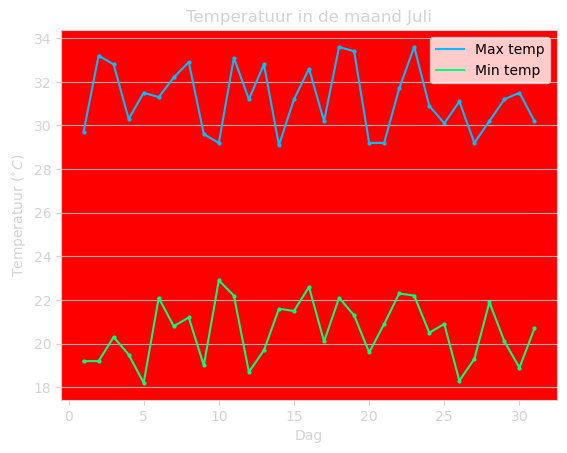

In [185]:
random.seed(1)

days = list(range(1, 32))
max_temp = [round(random.uniform(29.1, 33.9), 1) for _ in range(31)]
min_temp = [round(random.uniform(18.1, 22.9), 1) for _ in range(31)]

titel = "Temperatuur in de maand Juli"
xlabel = "Dag"
ylabel = "Temperatuur ($^{\\circ}C)$"
data_labels = ["Max temp", "Min temp"]


print(days)
print(max_temp)
print(min_temp)

lijndiagram(max_temp, min_temp, title=titel, xlabel=xlabel, ylabel=ylabel, data_x=days, legend=True, data_labels=data_labels)

### Average income with billionaire

<Figure size 640x480 with 0 Axes>

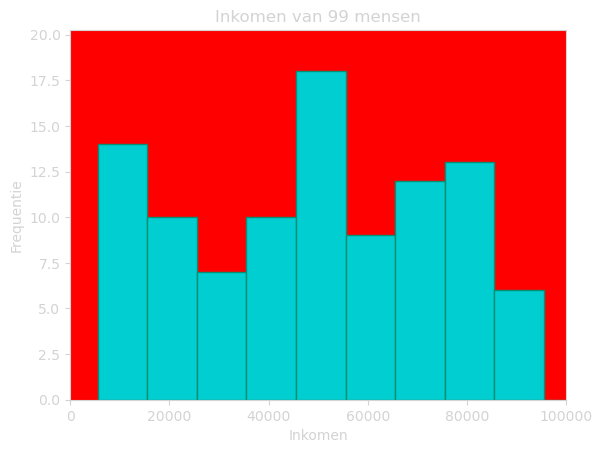

55834


In [186]:

average_income = [random.uniform(10000, 100000) for _ in range(99)]
data_label=["Inkomen Groep"]

histogram(average_income, title="Inkomen van 99 mensen", xlabel="Inkomen", ylabel="Frequentie", binsize=10000, x_range=(0, 100000))


average_income.append(1000000000)  # Add the billionaire's income
print(round(np.median(average_income)))


### Aantal huisdieren per leerling

Counter({1: 9, 0: 8, 2: 7, 3: 3, 4: 2, 5: 1})


<Figure size 640x480 with 0 Axes>

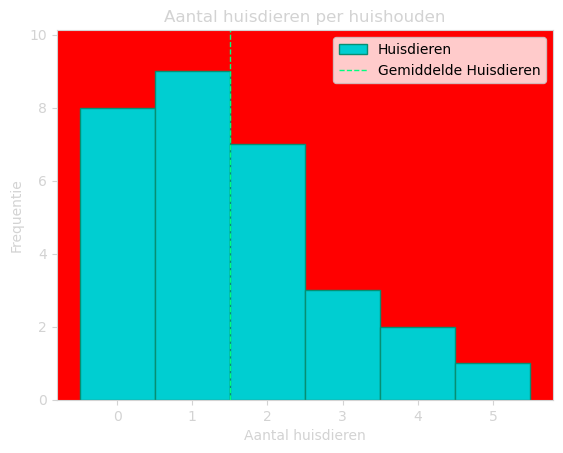

ModeResult(mode=array([1]), count=array([9]))
1.0


C:\Users\Marc_\AppData\Local\Temp\ipykernel_12724\1962254139.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(aantal_huisdieren))


In [187]:
aantal_huisdieren = [2,0,1,5,1,0,2,0,1,1,0,3,2,1,2,0,4,2,1,1,0,3,4,0,2,0,1,3,2,1]

data_count = Counter(aantal_huisdieren)
print(data_count)
sorted(data_count.items())

histogram(aantal_huisdieren, data_labels=['Huisdieren'], title="Aantal huisdieren per huishouden", xlabel="Aantal huisdieren", ylabel="Frequentie", binsize=1, average=True, legend=True)

print(stats.mode(aantal_huisdieren))
print(np.median(aantal_huisdieren))

### Data temperaturen winter

[-3.7, 3.5, 2.6, -2.4, -0.0, -0.5, 1.5]


<Figure size 640x480 with 0 Axes>

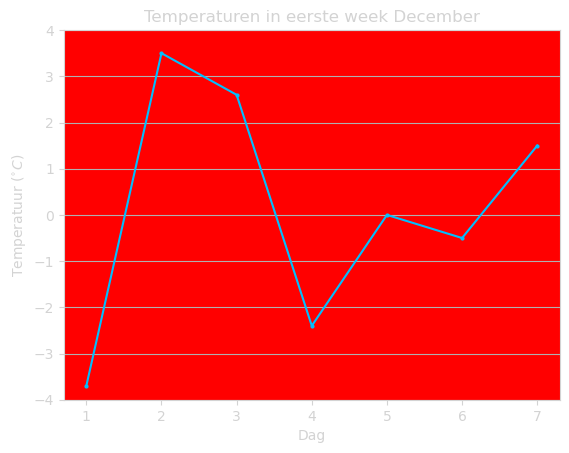

<Figure size 640x480 with 0 Axes>

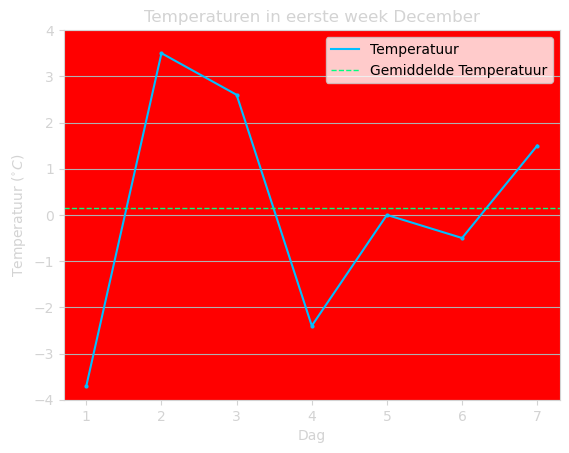

0.14285714285714285


In [191]:
random.seed(1)
days = list(range(1, 8))
temperatures = [round(random.uniform(-5, 5), 1) for _ in days]

print(temperatures)


titel = "Temperaturen in eerste week December"
xlabel = "Dag"
ylabel = "Temperatuur ($^{\\circ}C)$"
data_label = ["Temperatuur"]

lijndiagram(temperatures, data_labels=data_label, title=titel, xlabel=xlabel, ylabel=ylabel, y_range=(-4,4), data_x=days)
lijndiagram(temperatures, data_labels=data_label, title=titel, xlabel=xlabel, ylabel=ylabel, y_range=(-4,4), data_x=days, legend=True, average=True)

print(np.mean(temperatures))